## Audio classification with a pipeline

In [1]:
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="en-GB", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

/home/fds/miniconda3/envs/py310_pytorch/lib/python3.10/site-packages/datasets/load.py:1429: FutureWarning: The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [2]:
from transformers import pipeline

classifier = pipeline(
    "audio-classification",
    model="anton-l/xtreme_s_xlsr_300m_minds14"
)

/home/fds/miniconda3/envs/py310_pytorch/lib/python3.10/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

In [3]:
example = minds[0]

In [6]:
classifier(example["audio"]["array"])

[{'score': 0.9079536199569702, 'label': 'abroad'},
 {'score': 0.029420677572488785, 'label': 'pay_bill'},
 {'score': 0.02401948720216751, 'label': 'freeze'},
 {'score': 0.02351199835538864, 'label': 'card_issues'},
 {'score': 0.006443068850785494, 'label': 'app_error'}]

In [7]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])
# !?! What the?!

'pay_bill'

## Automatic speech recognition with a pipeline

In [3]:
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="en-GB", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

In [1]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
example = minds[0]
asr(example["audio"]["array"])

{'text': 'I WANT TO PAY BILL AND I KNOW I WANT TO KNOW HOW CAN I USE MY CRETIC CARD TO DO SO'}

In [5]:
example["english_transcription"]

'I want to pay a bill and I know I want to know how can I use my credit card to do so'

In [6]:
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="de-DE", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

/home/fds/miniconda3/envs/py310_pytorch/lib/python3.10/site-packages/datasets/load.py:1429: FutureWarning: The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [7]:
example = minds[0]
example["transcription"]

'ich möchte gerne Geld auf mein Konto einzahlen'

In [8]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="maxidl/wav2vec2-large-xlsr-german")
asr(example["audio"]["array"])

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

/home/fds/miniconda3/envs/py310_pytorch/lib/python3.10/site-packages/transformers/configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

{'text': 'ich möchte gerne geld auf mein konto einzallen'}

## Audio generation with a pipeline

In [6]:
from transformers import pipeline

pipe = pipeline("text-to-speech", model="suno/bark-small")

In [7]:
text = "Ladybugs have had important roles in culture and religion, being associated with luck, love, fertility and prophecy. "
output = pipe(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [8]:
from IPython.display import Audio

Audio(output["audio"], rate=output["sampling_rate"])

In [14]:
fr_text = "Contrairement à une idée répandue, le nombre de points sur les élytres d'une coccinelle ne correspond pas à son âge, ni en nombre d'années, ni en nombre de mois."
ouptupt = pipe(fr_text)
Audio(output["audio"], rate=output["sampling_rate"])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [19]:
song = "♪ In the jungle, the mighty jungle, the ladybug was seen. ♪"
output = pipe(song)
Audio(output["audio"], rate=output["sampling_rate"])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [9]:
music_pipe = pipeline("text-to-audio", model="facebook/musicgen-small")

In [10]:
text = "90s rock song with electric guitar and heavy drums"

In [11]:
forward_params = {"max_new_tokens": 512}

output = music_pipe(text, forward_params=forward_params)
Audio(output["audio"][0], rate=output["sampling_rate"])

## Hands-on exercise
Automatic speech recognition with facebook/voxpopuli dataset using pipeline library

In [14]:
from datasets import load_dataset

voxpopuli_de = load_dataset("facebook/voxpopuli", "de", streaming=True)

In [25]:
de_samples = voxpopuli_de["train"].take(3)
de_samples

IterableDataset({
    features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
    n_shards: 1
})

In [26]:
example = list(de_samples)[-1]
example

{'audio_id': '20150908-0900-PLENARY-3-de_20150908-09:01:12_26',
 'language': 1,
 'audio': {'path': 'train_part_0/20150908-0900-PLENARY-3-de_20150908-09:01:12_26.wav',
  'array': array([-0.01617432, -0.05258179, -0.06607056, ...,  0.00396729,
         -0.00219727, -0.00396729]),
  'sampling_rate': 16000},
 'raw_text': 'Denn es gibt biologische Grenzen beim Tier.',
 'normalized_text': 'denn es gibt biologische grenzen beim tier.',
 'gender': 'female',
 'speaker_id': '4282',
 'is_gold_transcript': True,
 'accent': 'None'}

In [29]:
# Audio

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16_000)

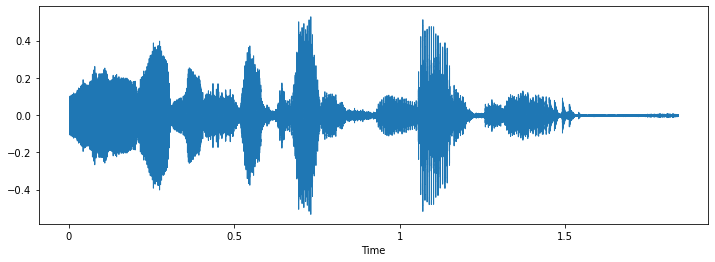

In [36]:
# Waveform

import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

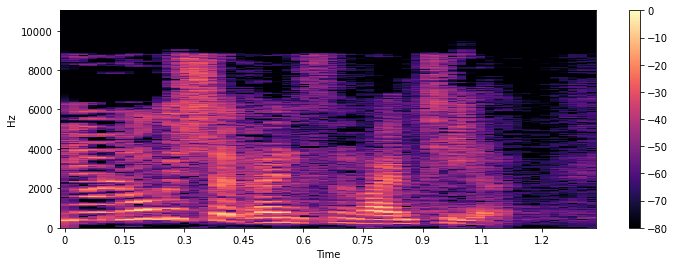

In [37]:
# Spectrogram

import matplotlib.pyplot as plt
import librosa.display
import librosa
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [39]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-large-xlsr-53-german")

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/330 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

In [45]:
# Compare the results

print(f"Predict = {asr(example['audio']['array'])}")
print(f"Label = {example['raw_text']}")

Predict = {'text': 'logihe grenzen beim tier'}
Label = Denn es gibt biologische Grenzen beim Tier.
